In [2]:
# Para el manejo eficiente del conjunto de datos
import pandas as pd 
import numpy as np
# Para el manejo de modelos estadísticos
from scipy import stats
# Para construir los elementos gráficos
import seaborn as sns 
import matplotlib.pyplot as plt
# Para la visualización de los valores nulos
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

import os



In [7]:
natalidad_2018 = pd.read_csv('./datos/sinac_2017.zip',low_memory=False)


    
    


C:\Users\benja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (11,47,49,52,64,66,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
natalidad_2018.columns

Index(['CEDOCVE', 'ENT_NACM', 'MPO_NACM', 'FECH_NACM', 'EDADM', 'CON_INDM',
       'HABLA_INDM', 'CUAL_LENGM', 'EDOCIVIL', 'TIPOVIAL_RES', 'TIPOASEN_RES',
       'ENT_RES', 'MPO_RES', 'LOC_RES', 'NUM_EMB', 'NUM_NACMTO', 'NUM_NACVIVO',
       'HIJO_SOBV', 'HIJO_ANTE', 'VIVE_AUN', 'ORDEN_NAC', 'ATEN_PREN',
       'TRIM_CONS', 'TOT_CONS', 'SOB_PARTO', 'DERHAB', 'DERHAB2', 'NIV_ESCOL',
       'OCUPHAB', 'CVEOCUPHAB', 'TRAB_ACT', 'FECH_NACH', 'HORA_NACH', 'SEXOH',
       'GESTACH', 'TALLAH', 'PESOH', 'APGARH', 'SILVERMAN', 'BCG', 'HEP_B',
       'VIT_A', 'VIT_K', 'TAM_AUD', 'PRODUCTO', 'ACELRN', 'CVE_CIE', 'ACELRN2',
       'CVE_CIE2', 'PROCNAC', 'FORCEPS', 'ESPECIFIQUE', 'INST_NAC', 'UNIMED',
       'CLUES', 'ATENDIO', 'ATEN_OTRO', 'TIPOVIAL_NAC', 'TIPOASEN_NAC',
       'ENT_NAC', 'MPO_NAC', 'LOC_NAC', 'CERT_POR', 'OTROMEDICO',
       'UNIMED_33_1', 'CLUES_33_2', 'TIPOVIAL_CERT', 'TIPOASEN_CERT',
       'ENT_CERT', 'MPO_CERT', 'LOC_CERT', 'FECH_CERT', 'FECH_ALTA',
       'FECH_CAMB', 'IDCA

In [32]:
natalidad_2018=natalidad_2018.drop('Unnamed: 0',axis=1)

In [43]:
natalidad_2018=natalidad_2018[natalidad_2018['ENT_NAC']==26]

In [34]:
natalidad_2018.tail(3)

,CEDOCVE,ENT_NACM,MPO_NACM,FECH_NACM,EDADM,CON_INDM,HABLA_INDM,CUAL_LENGM,EDOCIVIL,TIPOVIAL_RES,...,TIPOVIAL_CERT,TIPOASEN_CERT,ENT_CERT,MPO_CERT,LOC_CERT,FECH_CERT,FECH_ALTA,FECH_CAMB,IDCAPTURA,TIPO_FORMATO
2064504,30,29,33,29/09/2002,14,2,2,0,15,5.0,...,3.0,7.0,30,87,1,11/02/2017,11/02/2017,NaN,1.0,2015.0
2064505,30,30,141,19/12/2002,14,2,2,0,12,0.0,...,5.0,7.0,30,97,1,30/09/2017,30/09/2017,2017-09-10,NaN,2015.0
2064506,30,30,30,04/07/2004,13,2,2,0,15,3.0,...,3.0,7.0,30,6,1,24/07/2017,24/07/2017,NaN,NaN,2015.0


In [35]:
natalidad_2018.shape

(2064507, 76)

In [36]:
natalidad_2018.dtypes

CEDOCVE           int64
ENT_NACM          int64
MPO_NACM          int64
FECH_NACM        object
EDADM             int64
                 ...   
FECH_CERT        object
FECH_ALTA        object
FECH_CAMB        object
IDCAPTURA       float64
TIPO_FORMATO    float64
Length: 76, dtype: object

In [37]:
natalidad_2018.isnull().sum()

CEDOCVE               0
ENT_NACM              0
MPO_NACM              0
FECH_NACM             0
EDADM                 0
                 ...   
FECH_CERT             0
FECH_ALTA             0
FECH_CAMB       1865614
IDCAPTURA       1172429
TIPO_FORMATO        504
Length: 76, dtype: int64

In [38]:
msno.matrix(natalidad_2018)

<AxesSubplot:>

MemoryError: Unable to allocate 1.17 GiB for an array with shape (2064507, 76) and data type float64

<Figure size 1800x720 with 2 Axes>

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (77).

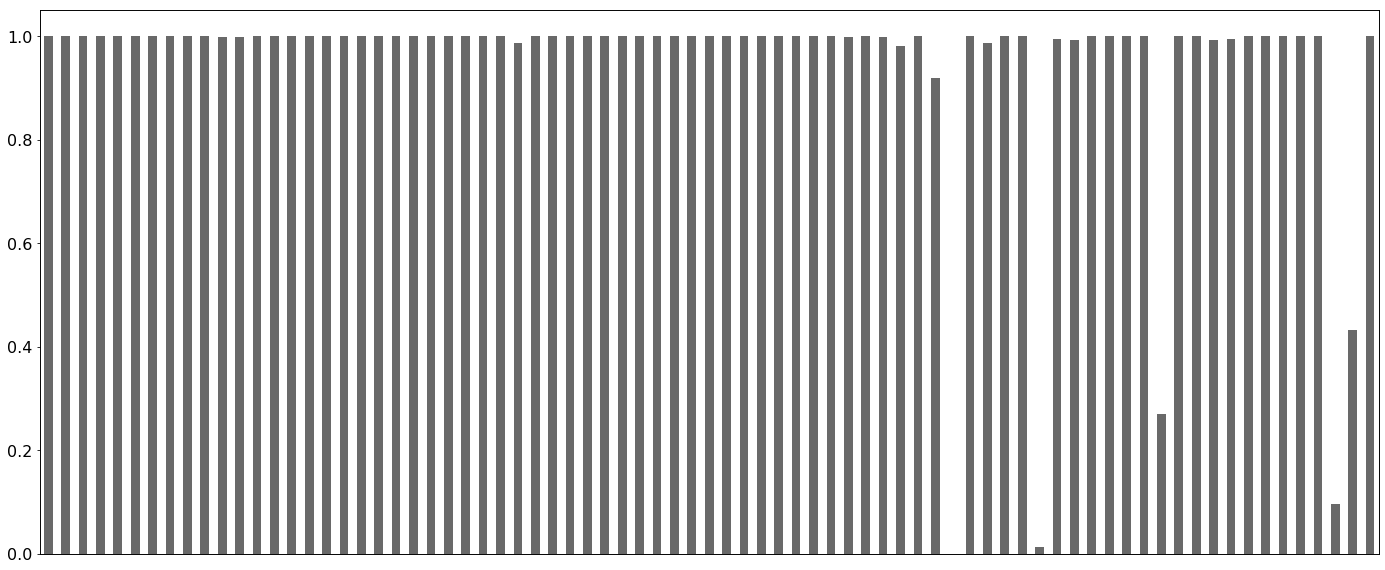

In [24]:
msno.bar(natalidad_2018)